In [1]:
import numpy as np
import pandas as pd

import sklearn as scikit_learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score as r2
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
from scipy import stats

import warnings
warnings.filterwarnings('ignore')


# Очистка и подготовка данных

In [2]:
TRAIN_DATASET_PATH = 'C:/Users/Анна/Desktop/А/Учеба/project_data_from_kaggle/train.csv' # y_train, y_valid
TEST_DATASET_PATH = 'C:/Users/Анна/Desktop/А/Учеба/project_data_from_kaggle/test.csv'

In [3]:
data_trein = pd.read_csv(TRAIN_DATASET_PATH)
data_test = pd.read_csv(TEST_DATASET_PATH)

Работа с data_trein

In [4]:
data_trein.head()

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  11809          27    3.0  115.027311         NaN           10.0      4   
1   3013          22    1.0   39.832524   23.169223            8.0      7   
2   8215           1    3.0   78.342215   47.671972           10.0      2   
3   2352           1    1.0   40.409907         NaN            1.0     10   
4  13866          94    2.0   64.285067   38.562517            9.0     16   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0        10.0       2014   0.075424         B         B        11      3097   
1         8.0       1966   0.118537         B         B        30      6207   
2        17.0       1988   0.025609         B         B        33      5261   
3        22.0       1977   0.007122         B         B         1       264   
4        16.0       1972   0.282798         B         B        33      8667   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         0           NaN            0        0       B  305018.871089  
1         1        1183.0            1        0       B  177734.553407  
2         0         240.0            3        1       B  282078.720850  
3         0           NaN            0        1       B  168106.007630  
4         2           NaN            0        6       B  343995.102962

In [5]:
data_trein.shape #размерность

(10000, 20)

In [6]:
data_trein.describe() #статистика

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315775    37.199645   
std     4859.01902     43.587592      0.839512     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000     19.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

In [7]:
data_trein.info() #размерность, описание индексов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [8]:
data_trein.nunique() #количество уникальных значений

Id               10000
DistrictId         205
Rooms                9
Square           10000
LifeSquare        7887
KitchenSquare       58
Floor               33
HouseFloor          44
HouseYear           97
Ecology_1          129
Ecology_2            2
Ecology_3            2
Social_1            51
Social_2           142
Social_3            30
Healthcare_1        79
Helthcare_2          7
Shops_1             16
Shops_2              2
Price            10000
dtype: int64

In [9]:
# Удаляем колонку с показателями которые имеею мало значений для более точной работы модели
data_trein.drop(['Ecology_2', 'Ecology_3', 'Helthcare_2', 'Shops_2', 'Shops_1', 'Social_3'], axis=1, inplace=True)

In [10]:
data_trein.columns #выявляем наличие категориальных значений
data_trein.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Social_1           int64
Social_2           int64
Healthcare_1     float64
Price            float64
dtype: object

In [11]:
data_trein.isnull().astype(np.int).sum().astype(np.int) #пропуски

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Social_1            0
Social_2            0
Healthcare_1     4798
Price               0
dtype: int32

In [12]:
data_trein.columns[data_trein.isna().any()].tolist() #пропуски по колонкам с названием

['LifeSquare', 'Healthcare_1']

In [13]:
data_trein['LifeSquare'].mean(), data_trein['LifeSquare'].median()

(37.199644827673275, 32.781260192155735)

In [14]:
data_trein['LifeSquare']= data_trein['LifeSquare'].fillna(32.781260)

In [15]:
data_trein['Healthcare_1'].mean(), data_trein['Healthcare_1'].median()

(1142.9044598231449, 900.0)

In [16]:
data_trein['Healthcare_1']= data_trein['Healthcare_1'].fillna(900.0)

In [17]:
data_trein.isnull().astype(np.int).sum().astype(np.int)

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Healthcare_1     0
Price            0
dtype: int32

In [18]:
data_trein.duplicated() #поиск дубликатов

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

Работа с data_test

In [19]:
data_test.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  4567          44    1.0  36.847630   19.094182            5.0      5   
1  5925          62    1.0  42.493907   42.568133           10.0      7   
2   960          27    2.0  59.463678         NaN            9.0     19   
3  3848          23    3.0  49.646030   33.893825            6.0      2   
4   746          74    1.0  53.837056         NaN            1.0      8   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1970   0.036122         B         B        24      4378   
1        17.0       2017   0.072158         B         B         2       629   
2        19.0       1977   0.211401         B         B         9      1892   
3         2.0       1965   0.014073         B         B         2       475   
4        17.0       1977   0.309479         B         B        35      7715   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
0         0        1036.0            1        1       B  
1         1           NaN            0        0       A  
2         0           NaN            0        1       B  
3         0           NaN            0        0       B  
4         4         990.0            0        6       B

In [20]:
data_test.shape #размерность

(5000, 19)

In [21]:
data_test.describe() #статистика

Id   DistrictId        Rooms       Square   LifeSquare  \
count   5000.000000  5000.000000  5000.000000  5000.000000  3959.000000   
mean    8412.595400    51.279200     1.910000    56.449500    36.158810   
std     4832.674037    44.179466     0.838594    19.092787    17.825287   
min        1.000000     0.000000     0.000000     1.378543     0.333490   
25%     4221.750000    21.000000     1.000000    41.906231    23.092026   
50%     8320.500000    37.000000     2.000000    52.921340    32.925087   
75%    12598.250000    77.000000     2.000000    66.285129    45.174091   
max    16795.000000   212.000000    17.000000   223.453689   303.071094   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean        5.976800     8.632000    12.601000  1984.392600     0.119874   
std         9.950018     5.483228     6.789213    18.573149     0.120070   
min         0.000000     1.000000     0.000000  1908.000000     0.000000   
25%         1.000000     4.000000     9.000000  1973.000000     0.019509   
50%         6.000000     7.000000    12.000000  1977.000000     0.072158   
75%         9.000000    12.000000    17.000000  2000.000000     0.195781   
max       620.000000    78.000000    99.000000  2020.000000     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  5000.000000   5000.000000  5000.000000   2623.000000   5000.00000   
mean     24.933800   5406.900000     8.262600   1146.657263      1.31940   
std      17.532202   4026.614773    23.863762   1044.744231      1.47994   
min       0.000000    168.000000     0.000000      0.000000      0.00000   
25%       6.000000   1564.000000     0.000000    325.000000      0.00000   
50%      25.000000   5285.000000     2.000000    900.000000      1.00000   
75%      36.000000   7287.000000     5.000000   1548.000000      2.00000   
max      74.000000  19083.000000   141.000000   4849.000000      6.00000   

           Shops_1  
count  5000.000000  
mean      4.242800  
std       4.777365  
min       0.000000  
25%       1.000000  
50%       3.000000  
75%       6.000000  
max      23.000000

In [22]:
data_test.info() #размерность, описание индексов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [23]:
data_test.nunique() #количество уникальных значений

Id               5000
DistrictId        201
Rooms               8
Square           5000
LifeSquare       3959
KitchenSquare      38
Floor              35
HouseFloor         41
HouseYear          97
Ecology_1         130
Ecology_2           2
Ecology_3           2
Social_1           51
Social_2          143
Social_3           30
Healthcare_1       79
Helthcare_2         7
Shops_1            16
Shops_2             2
dtype: int64

In [24]:
data_test.columns #выявляем наличие категориальных значений
data_test.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [25]:
# Удаляем колонку с показателями которые имеею мало значений для более точной работы модели
data_test.drop(['Ecology_2', 'Ecology_3', 'Helthcare_2', 'Shops_2', 'Shops_1', 'Social_3'], axis=1, inplace=True)

In [26]:
data_test.isnull().astype(np.int).sum().astype(np.int) #пропуски

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Social_1            0
Social_2            0
Healthcare_1     2377
dtype: int32

In [27]:
data_test.columns[data_test.isna().any()].tolist()

['LifeSquare', 'Healthcare_1']

In [28]:
data_test['LifeSquare'].mean(), data_test['LifeSquare'].median()

(36.15881045508669, 32.92508663208161)

In [29]:
data_test['LifeSquare']= data_test['LifeSquare'].fillna(32.925)

In [30]:
data_test['Healthcare_1'].mean(), data_test['Healthcare_1'].median()

(1146.6572626763248, 900.0)

In [31]:
data_test['Healthcare_1']= data_test['Healthcare_1'].fillna(900.0)

Работа с признаками

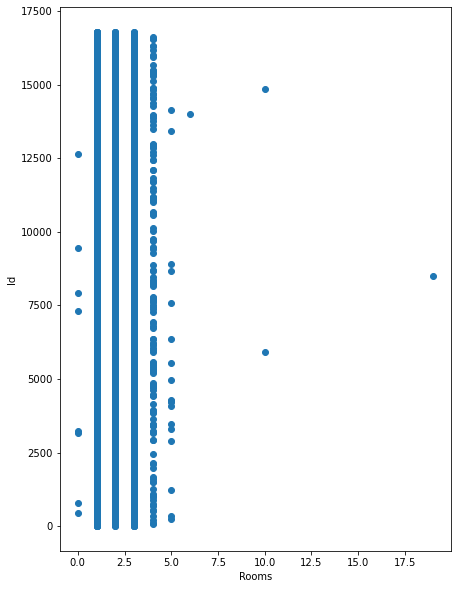

In [32]:
fig, ax = plt.subplots(figsize = (7,10)) #выбросы
ax.scatter(data_trein['Rooms'], data_trein['Id'])

ax.set_xlabel('Rooms')
ax.set_ylabel('Id')
plt.show()

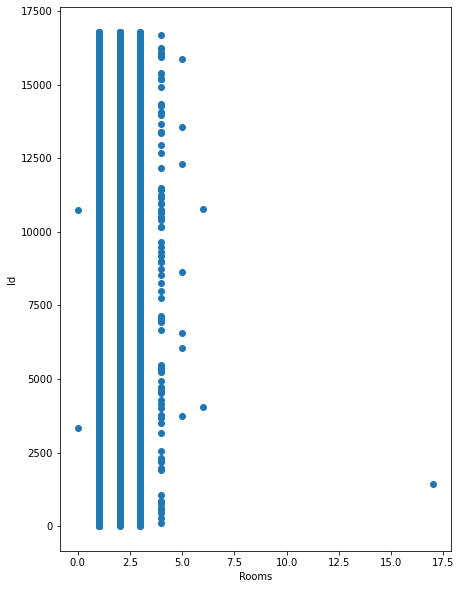

In [33]:
fig, ax = plt.subplots(figsize = (7,10)) #выбросы
ax.scatter(data_test['Rooms'], data_test['Id'])

ax.set_xlabel('Rooms')
ax.set_ylabel('Id')
plt.show()

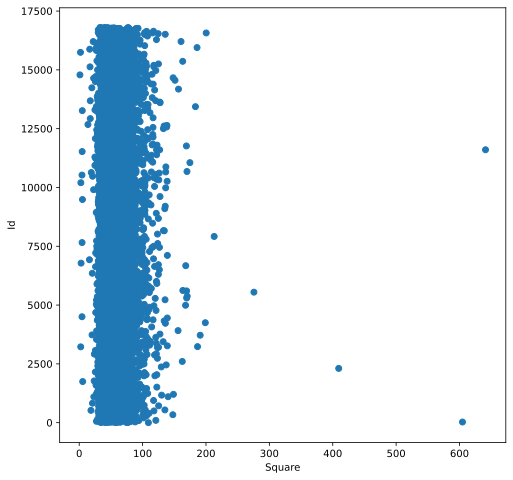

In [34]:
%config InlineBackend.figure_format = 'svg'

fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(data_trein['Square'], data_trein['Id'])

ax.set_xlabel('Square')
ax.set_ylabel('Id')
plt.show()

Признак 'KitchenSquare'

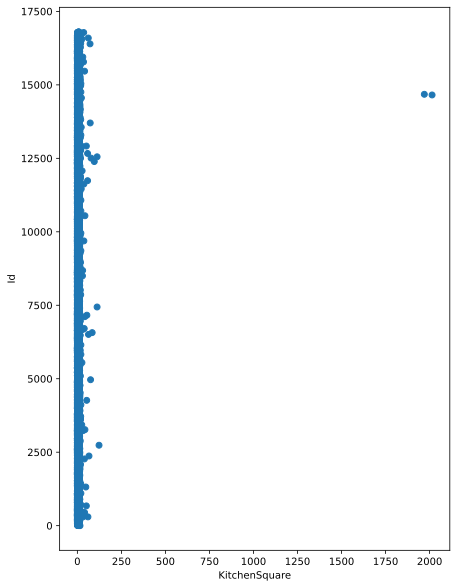

In [35]:
fig, ax = plt.subplots(figsize = (7,10)) #выбросы
ax.scatter(data_trein['KitchenSquare'], data_trein['Id'])

ax.set_xlabel('KitchenSquare')
ax.set_ylabel('Id')
plt.show()

In [36]:
KitchenSquare_v=(np.where(data_trein['KitchenSquare']>1750))
KitchenSquare_v

(array([6505, 9520], dtype=int64),)

In [37]:
data_trein.drop(KitchenSquare_v[0], inplace = True)

In [38]:
data_trein.shape

(9998, 14)

Признак 'Floor'

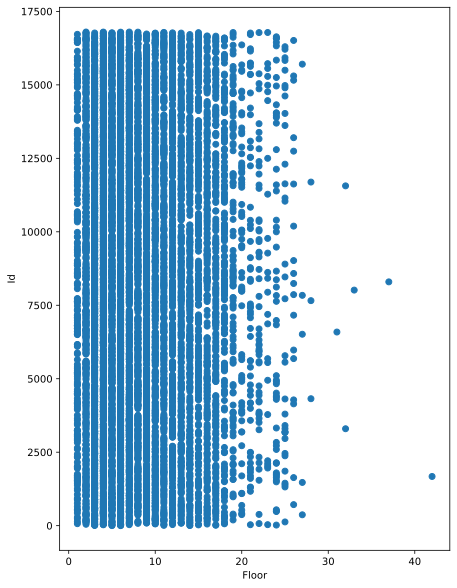

In [39]:
fig, ax = plt.subplots(figsize = (7,10)) #выбросы
ax.scatter(data_trein['Floor'], data_trein['Id'])

ax.set_xlabel('Floor')
ax.set_ylabel('Id')
plt.show()

Признак 'HouseFloor'

<AxesSubplot:xlabel='HouseFloor'>

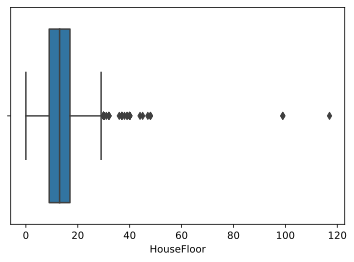

In [40]:
sns.boxplot(data_trein['HouseFloor'])

Признак 'HouseYear'

In [41]:
data_trein.sort_values('HouseYear')

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
6794  13288         161    1.0   50.808925   15.920343           20.0      8   
2795   2085         161    1.0   63.293079   29.389815           18.0      3   
2066  14556         183    4.0  151.150660   98.187482           23.0      6   
6250   6751         172    2.0   56.172364   28.384213            7.0      8   
7610   7920         183    3.0  102.964468   48.322107           14.0      4   
...     ...         ...    ...         ...         ...            ...    ...   
6073   6845         169    3.0   87.371123   64.905206           12.0      4   
5641  15051          53    2.0   59.597891   44.869530           10.0      3   
8296   8832           1    3.0   83.260743   79.438325            1.0     15   
8828  11607         147    2.0   44.791836   28.360393            5.0      4   
9163  10814         109    1.0   37.265070   20.239714            9.0      9   

      HouseFloor  HouseYear  Ecology_1  Social_1  Social_2  Healthcare_1  \
6794         9.0       1910   0.014423        19      3806         900.0   
2795         9.0       1912   0.014423        19      3806         900.0   
2066         7.0       1912   0.037316        32      6748         562.0   
6250         6.0       1914   0.000000         7      1660        1786.0   
7610         6.0       1916   0.037316        32      6748         562.0   
...          ...        ...        ...       ...       ...           ...   
6073        24.0       2020   0.178917        18      3594         192.0   
5641        24.0       2020   0.049637        34      7759         229.0   
8296        21.0       2020   0.007122         1       264         900.0   
8828         9.0       4968   0.319809        25      4756        2857.0   
9163        12.0   20052011   0.136330        30      6141         262.0   

              Price  
6794  287954.720682  
2795  262279.813915  
2066  284884.959104  
6250  423580.477982  
7610  284608.939261  
...             ...  
6073  295304.011974  
5641  243114.222804  
8296  242243.090839  
8828  243028.603096  
9163  254084.534396  

[9998 rows x 14 columns]

In [42]:
data_trein.drop(labels = [9163],axis = 0, inplace = True)

In [43]:
data_trein.drop(labels = [8828],axis = 0, inplace = True)

In [44]:
data_trein.shape

(9996, 14)

In [45]:
data_test.sort_values('HouseYear')

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1929  12316         183    5.0  157.976101  101.040485           12.0      7   
3166   5480         190    1.0   13.597819   15.948246           12.0      2   
2990   9076          60    3.0   61.400464   38.591813            8.0      5   
4046   3726         161    1.0   52.708494   20.502345           11.0      3   
4836  16217         206    4.0   76.428426   50.344903           11.0      7   
...     ...         ...    ...         ...         ...            ...    ...   
3016   9398          58    2.0   70.999008   32.925000           17.0     13   
4416   8560          37    2.0   57.979074   32.925000           10.0      7   
1661   4696          59    2.0   75.577646   41.758328           15.0      8   
4628    651          53    1.0   40.108538   21.984746            8.0     12   
3959  16098          62    2.0   64.481854   36.653054            9.0     12   

      HouseFloor  HouseYear  Ecology_1  Social_1  Social_2  Healthcare_1  
1929         8.0       1908   0.246624        14      2940         900.0  
3166         5.0       1909   0.000000        30      7538        4702.0  
2990         5.0       1910   0.341072        27      5664        2300.0  
4046         7.0       1911   0.014423        19      3806         900.0  
4836         6.0       1912   0.042032        37      6856        1940.0  
...          ...        ...        ...       ...       ...           ...  
3016        15.0       2020   0.437885        23      5735        1084.0  
4416        20.0       2020   0.178917        18      3594         192.0  
1661        20.0       2020   0.019509        37      7687         176.0  
4628        24.0       2020   0.049637        34      7759         229.0  
3959        14.0       2020   0.072158         2       629         900.0  

[5000 rows x 13 columns]

Признак 'Ecology_1'

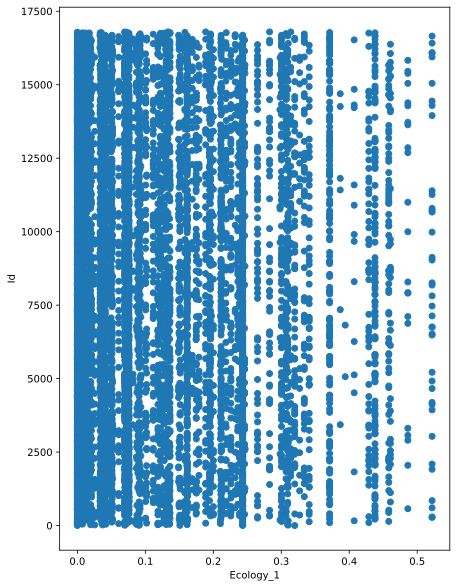

In [46]:
fig, ax = plt.subplots(figsize = (7,10)) 
ax.scatter(data_trein['Ecology_1'], data_trein['Id'])

ax.set_xlabel('Ecology_1')
ax.set_ylabel('Id')
plt.show()

Признак 'Social_1'

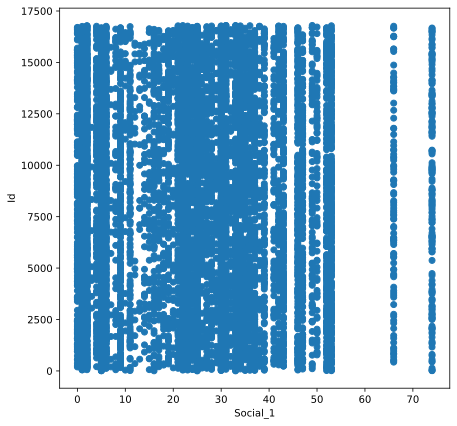

In [47]:
fig, ax = plt.subplots(figsize = (7,7)) 
ax.scatter(data_trein['Social_1'], data_trein['Id'])

ax.set_xlabel('Social_1')
ax.set_ylabel('Id')
plt.show()

Признак 'Social_2'


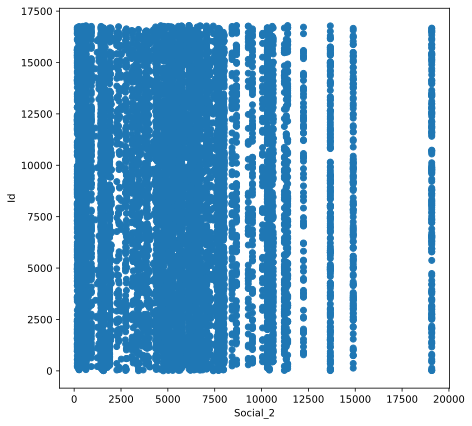

In [48]:
fig, ax = plt.subplots(figsize = (7,7)) 
ax.scatter(data_trein['Social_2'], data_trein['Id'])

ax.set_xlabel('Social_2')
ax.set_ylabel('Id')
plt.show()

Признак 'Healthcare_1'

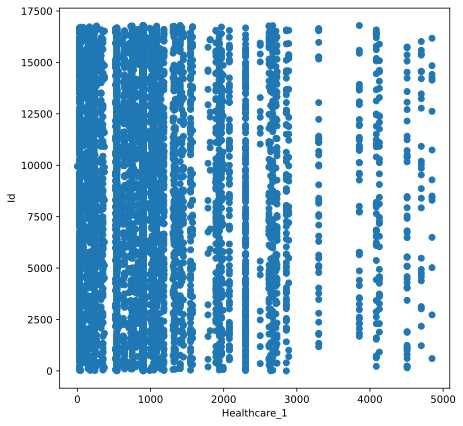

In [49]:
fig, ax = plt.subplots(figsize = (7,7)) 
ax.scatter(data_trein['Healthcare_1'], data_trein['Id'])

ax.set_xlabel('Healthcare_1')
ax.set_ylabel('Id')
plt.show()

# Обучение модели

In [50]:
data_trein.head()

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  11809          27    3.0  115.027311   32.781260           10.0      4   
1   3013          22    1.0   39.832524   23.169223            8.0      7   
2   8215           1    3.0   78.342215   47.671972           10.0      2   
3   2352           1    1.0   40.409907   32.781260            1.0     10   
4  13866          94    2.0   64.285067   38.562517            9.0     16   

   HouseFloor  HouseYear  Ecology_1  Social_1  Social_2  Healthcare_1  \
0        10.0       2014   0.075424        11      3097         900.0   
1         8.0       1966   0.118537        30      6207        1183.0   
2        17.0       1988   0.025609        33      5261         240.0   
3        22.0       1977   0.007122         1       264         900.0   
4        16.0       1972   0.282798        33      8667         900.0   

           Price  
0  305018.871089  
1  177734.553407  
2  282078.720850  
3  168106.007630  
4  343995.102962

In [51]:
data_trein.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Healthcare_1',
 'Price']

In [52]:
name_features = ['DistrictId','Rooms','Square','LifeSquare','KitchenSquare','Floor','HouseFloor','HouseYear','Ecology_1','Social_1','Social_2','Healthcare_1']

In [53]:
X = data_trein[name_features]

In [54]:
X.head()

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0          27    3.0  115.027311   32.781260           10.0      4   
1          22    1.0   39.832524   23.169223            8.0      7   
2           1    3.0   78.342215   47.671972           10.0      2   
3           1    1.0   40.409907   32.781260            1.0     10   
4          94    2.0   64.285067   38.562517            9.0     16   

   HouseFloor  HouseYear  Ecology_1  Social_1  Social_2  Healthcare_1  
0        10.0       2014   0.075424        11      3097         900.0  
1         8.0       1966   0.118537        30      6207        1183.0  
2        17.0       1988   0.025609        33      5261         240.0  
3        22.0       1977   0.007122         1       264         900.0  
4        16.0       1972   0.282798        33      8667         900.0

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     9996 non-null   int64  
 1   Rooms          9996 non-null   float64
 2   Square         9996 non-null   float64
 3   LifeSquare     9996 non-null   float64
 4   KitchenSquare  9996 non-null   float64
 5   Floor          9996 non-null   int64  
 6   HouseFloor     9996 non-null   float64
 7   HouseYear      9996 non-null   int64  
 8   Ecology_1      9996 non-null   float64
 9   Social_1       9996 non-null   int64  
 10  Social_2       9996 non-null   int64  
 11  Healthcare_1   9996 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 1015.2 KB


In [56]:
target = data_trein["Price"]
target[:10]

0    305018.871089
1    177734.553407
2    282078.720850
3    168106.007630
4    343995.102962
5    161044.944138
6    142402.739272
7    326174.175191
8    160400.401732
9    194756.023945
Name: Price, dtype: float64

In [57]:
y = pd.DataFrame(target, columns=["Price"])
y

Price
0     305018.871089
1     177734.553407
2     282078.720850
3     168106.007630
4     343995.102962
...             ...
9995  119367.455796
9996  199715.148807
9997  165953.912580
9998  171842.411855
9999  177685.627486

[9996 rows x 1 columns]

Разбитие данных для обучения

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.51)

Модель с использованием случайного леса RandomForest

In [59]:

model = RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [60]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [61]:
y_pred = model.predict(X_test)

In [62]:
y_pred.shape

(5098,)

In [63]:
check_test = pd.DataFrame({
    "y_test": y_test['Price'],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

y_test         y_pred
9097  281272.436685  352500.520273
6945  181080.911759  190510.557143
6714  349107.666290  312774.704220
3640  243738.666388  264751.136707
1620  170148.608535  175016.133617
1887  109873.366020  125035.215121
2788  166615.962950  166222.119654
2738  175670.992170  193342.110280
493   146735.671740  149971.463095
4664  188959.104330  178837.159162

In [67]:
from sklearn.metrics import r2_score
r2_score=r2_score(check_test["y_test"], check_test["y_pred"])
r2_score

0.7045628919058561

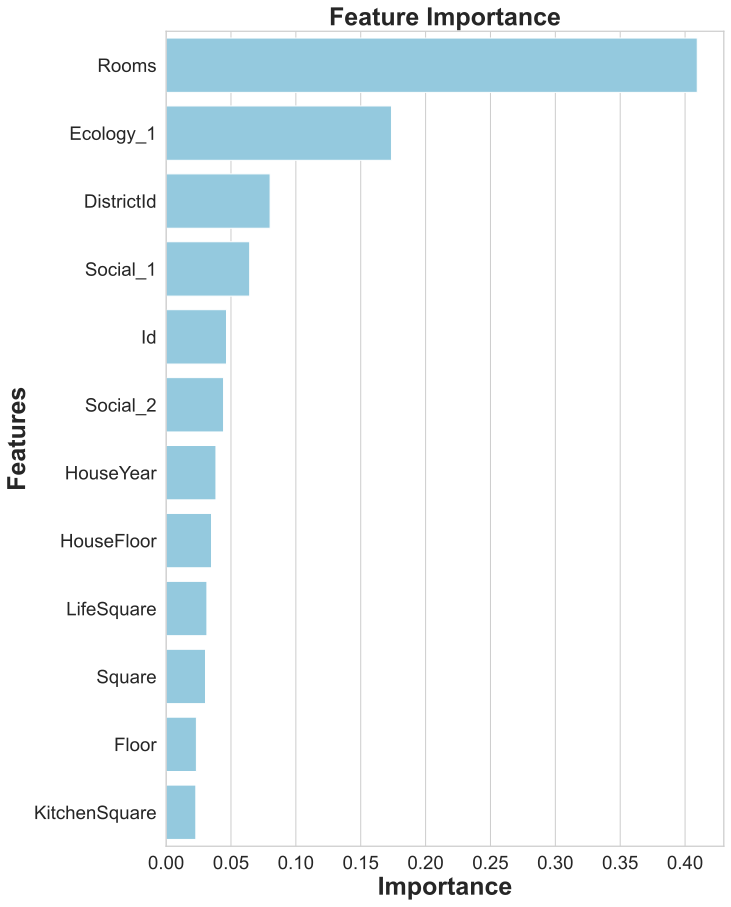

None

Features  Gini-Importance
0           Rooms         0.409379
1       Ecology_1         0.173701
2      DistrictId         0.080157
3        Social_1         0.064427
4              Id         0.046557
5        Social_2         0.044285
6       HouseYear         0.038414
7      HouseFloor         0.035001
8      LifeSquare         0.031450
9          Square         0.030367
10          Floor         0.023349
11  KitchenSquare         0.022913

In [68]:
feats = {}
for feature, importance in zip(data_trein.columns, model.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(10,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

# Оценка производительности

In [72]:


cv_score = cross_val_score(
    model,
    X.fillna(-9999),
    y, scoring='r2',
    cv=KFold(n_splits=5, shuffle=True, random_state=21)
)
cv_score

array([0.68695444, 0.75198077, 0.69375366, 0.7278609 , 0.71925496])

In [73]:
cv_score.mean(), cv_score.std()

(0.7159609442819742, 0.02359842592953646)

In [74]:
cv_score.mean() - cv_score.std(), cv_score.mean() + cv_score.std()

(0.6923625183524378, 0.7395593702115106)

In [77]:
y_pred = y_pred[0:5000]
y_pred

array([352500.52027295, 190510.55714324, 312774.70421974, ...,
       202488.42459724, 173082.98274635, 104049.57833268])

In [78]:
submission = {
    'Id': data_test.Id.values,
    'Price': y_pred
}
solution = pd.DataFrame(submission)
solution.to_csv('SShirkin_predictions.csv',index=False)